<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Big Data II - Armazenamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Orientação a coluna;</li>
  <li>Particionamento.</li>
</ol>

---

# **Exercícios**

## 1\. Particionamento e orientação a coluna.

Replique as atividades da aula 3 em sua conta da AWS.

1.1. Faça o download do arquivo `crime.csv` (fonte [Kaggle](https://www.kaggle.com/yamqwe/chicago-crimee?select=chicago_crime_2014.csv)).

In [1]:
!wget https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv -q -O crime.csv

1.2. Leia os dados em um DataFrame Pandas e crie a coluna `reference_date`.

In [9]:
# Solução do item 1.2.

import pandas as pd

filename = './crime'

df = pd.read_csv(f'./{filename}.csv')

In [10]:
# Lendo as primeiras linhas do dataframe para entender a estrutura de dados.
df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702
2,2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333
3,3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739
4,4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069


In [18]:
# Criando a coluna reference date no formato YYYY-MM-DD, usando como base a coluna date.

from datetime import datetime

df['reference_date'] = df['Date'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d'))

In [17]:
# Verificando a coluna criada

df.tail(10)

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,reference_date
274413,274413,10356631,HY547498,03/01/2014 08:00:00 AM,072XX S MOZART ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,831,8,18.0,66.0,11,NaN,NaN,2014-03-01
274414,274414,10357135,HY548164,12/18/2014 11:10:00 AM,016XX S CHRISTIANA AVE,0820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, GROUNDS",False,False,1021,10,24.0,29.0,06,NaN,NaN,2014-12-18
274415,274415,10357800,HY548744,04/01/2014 07:00:00 AM,054XX N SHERIDAN RD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2023,20,48.0,77.0,11,NaN,NaN,2014-04-01
274416,274416,10360427,HY552214,12/26/2014 07:15:00 PM,067XX S CORNELL AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,332,3,5.0,43.0,17,NaN,NaN,2014-12-26
274417,274417,10360904,HY552506,04/01/2014 09:00:00 AM,003XX W FULLERTON PKWY,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1814,18,43.0,7.0,11,NaN,NaN,2014-04-01
274418,274418,10362481,HY554205,08/15/2014 09:00:00 PM,048XX N CLARK ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,2032,20,46.0,3.0,11,NaN,NaN,2014-08-15
274419,274419,10362558,HY554336,08/31/2014 03:00:00 AM,028XX W 19TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,False,False,1022,10,12.0,30.0,02,NaN,NaN,2014-08-31
274420,274420,10363233,HY554972,02/20/2014 12:00:00 PM,046XX W NORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2533,25,37.0,25.0,11,NaN,NaN,2014-02-20
274421,274421,10363368,HY555019,09/02/2014 09:00:00 AM,047XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3.0,11,NaN,NaN,2014-09-02
274422,274422,10364473,HY556366,12/04/2014 09:00:00 AM,012XX W LUNT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2431,24,49.0,1.0,11,NaN,NaN,2014-12-04


1.3. Persista o dado no DataFrame em um arquivo csv e em arquivos parquet, estes últimos comprimidos e particionados pela coluna `reference_date`.

In [19]:
# Solução do item 1.3.

# Salvando em CSV
df.to_csv('./crime_enriched.csv', sep=',', index=False)

# Salvando em parquet e comprimido
df.to_parquet('./crime', engine='pyarrow', compression='gzip', partition_cols='reference_date')

1.4. Crie os recursos no AWS S3 e AWS IAM e persista os dados em seus respectivos *buckets*.

In [ ]:
# Solução do item 1.4.

**Usuário no IAM**

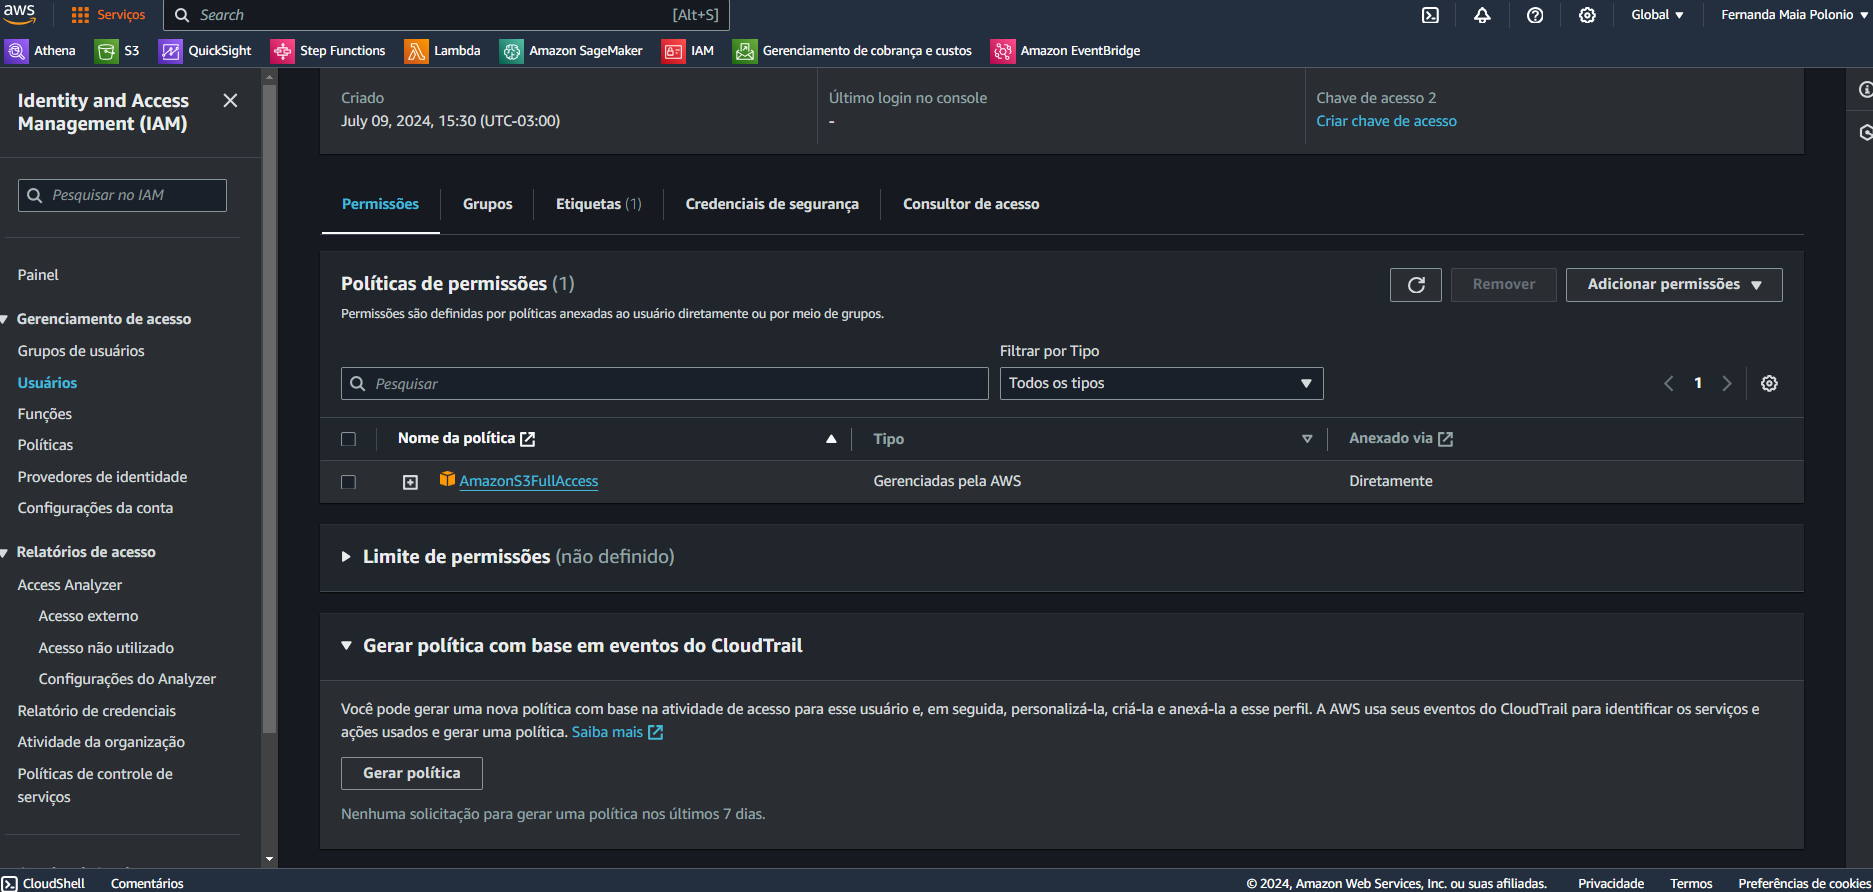

**Buckets criados**

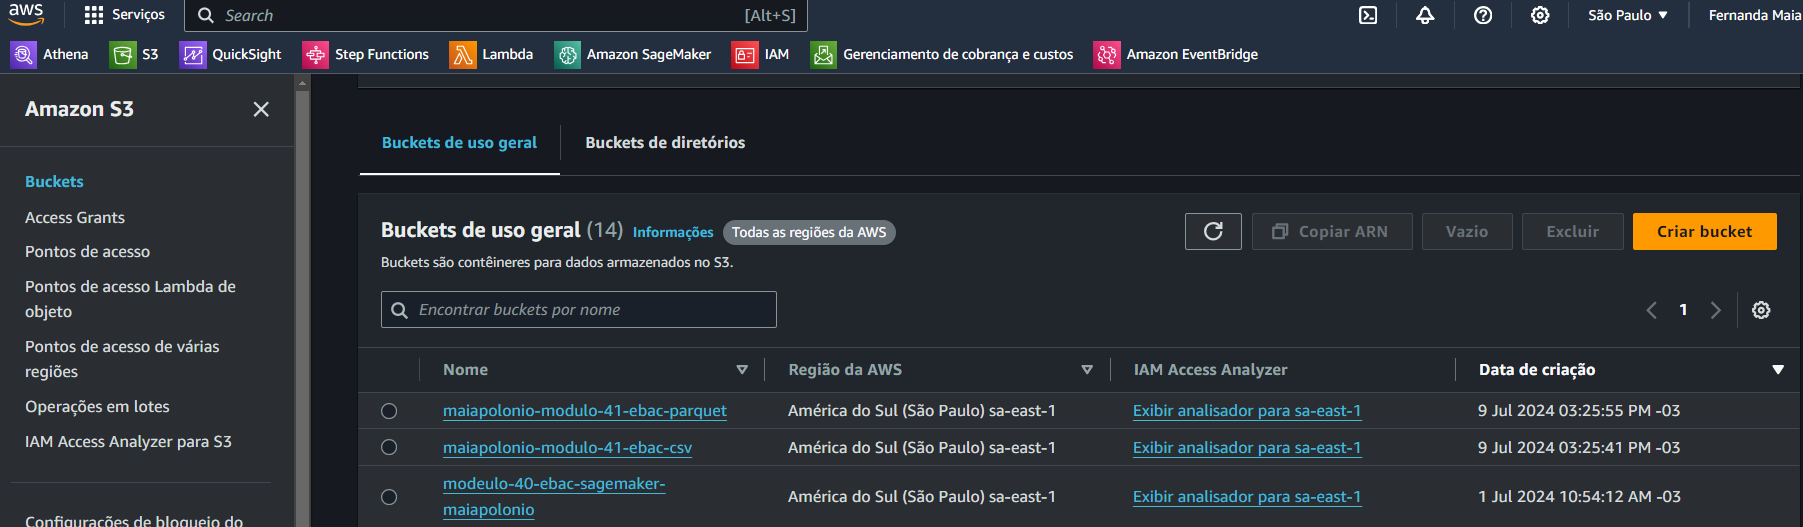

In [20]:
# Inserindo as credenciais no Python da AWS IAM

from getpass import getpass

aws_access_key_id = getpass()

··········


In [21]:
from getpass import getpass

aws_secret_access_key = getpass()

··········


In [22]:
# Instalar o pacote Boto3, o SDK Python da AWS.

!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.4 MB/s eta 0:00:00


In [23]:
import boto3

client = boto3.client(
  's3',
  aws_access_key_id=aws_access_key_id,
  aws_secret_access_key=aws_secret_access_key
)

In [24]:
import os

BUCKET = 'maiapolonio-modulo-41-ebac-parquet'

i = 0

for root, dirs, files in os.walk('./crime'):
  elapsed = f'{round(100*i/365, 2)} %'
  print(elapsed)
  for file in files:
    path = os.path.join(root, file)
    bucket_path = '/'.join(path.split(sep='/')[2:])
    client.upload_file(path, BUCKET, bucket_path)
  i = i + 1

0.0 %
0.27 %
0.55 %
0.82 %
1.1 %
1.37 %
1.64 %
1.92 %
2.19 %
2.47 %
2.74 %
3.01 %
3.29 %
3.56 %
3.84 %
4.11 %
4.38 %
4.66 %
4.93 %
5.21 %
5.48 %
5.75 %
6.03 %
6.3 %
6.58 %
6.85 %
7.12 %
7.4 %
7.67 %
7.95 %
8.22 %
8.49 %
8.77 %
9.04 %
9.32 %
9.59 %
9.86 %
10.14 %
10.41 %
10.68 %
10.96 %
11.23 %
11.51 %
11.78 %
12.05 %
12.33 %
12.6 %
12.88 %
13.15 %
13.42 %
13.7 %
13.97 %
14.25 %
14.52 %
14.79 %
15.07 %
15.34 %
15.62 %
15.89 %
16.16 %
16.44 %
16.71 %
16.99 %
17.26 %
17.53 %
17.81 %
18.08 %
18.36 %
18.63 %
18.9 %
19.18 %
19.45 %
19.73 %
20.0 %
20.27 %
20.55 %
20.82 %
21.1 %
21.37 %
21.64 %
21.92 %
22.19 %
22.47 %
22.74 %
23.01 %
23.29 %
23.56 %
23.84 %
24.11 %
24.38 %
24.66 %
24.93 %
25.21 %
25.48 %
25.75 %
26.03 %
26.3 %
26.58 %
26.85 %
27.12 %
27.4 %
27.67 %
27.95 %
28.22 %
28.49 %
28.77 %
29.04 %
29.32 %
29.59 %
29.86 %
30.14 %
30.41 %
30.68 %
30.96 %
31.23 %
31.51 %
31.78 %
32.05 %
32.33 %
32.6 %
32.88 %
33.15 %
33.42 %
33.7 %
33.97 %
34.25 %
34.52 %
34.79 %
35.07 %
35.34 %
35.62 %
35

1.5. Crie os recursos no AWS Athena e execute as consultas SQL da aula.

In [ ]:
# Solução do item 1.5.

**Criando as Tabelas**

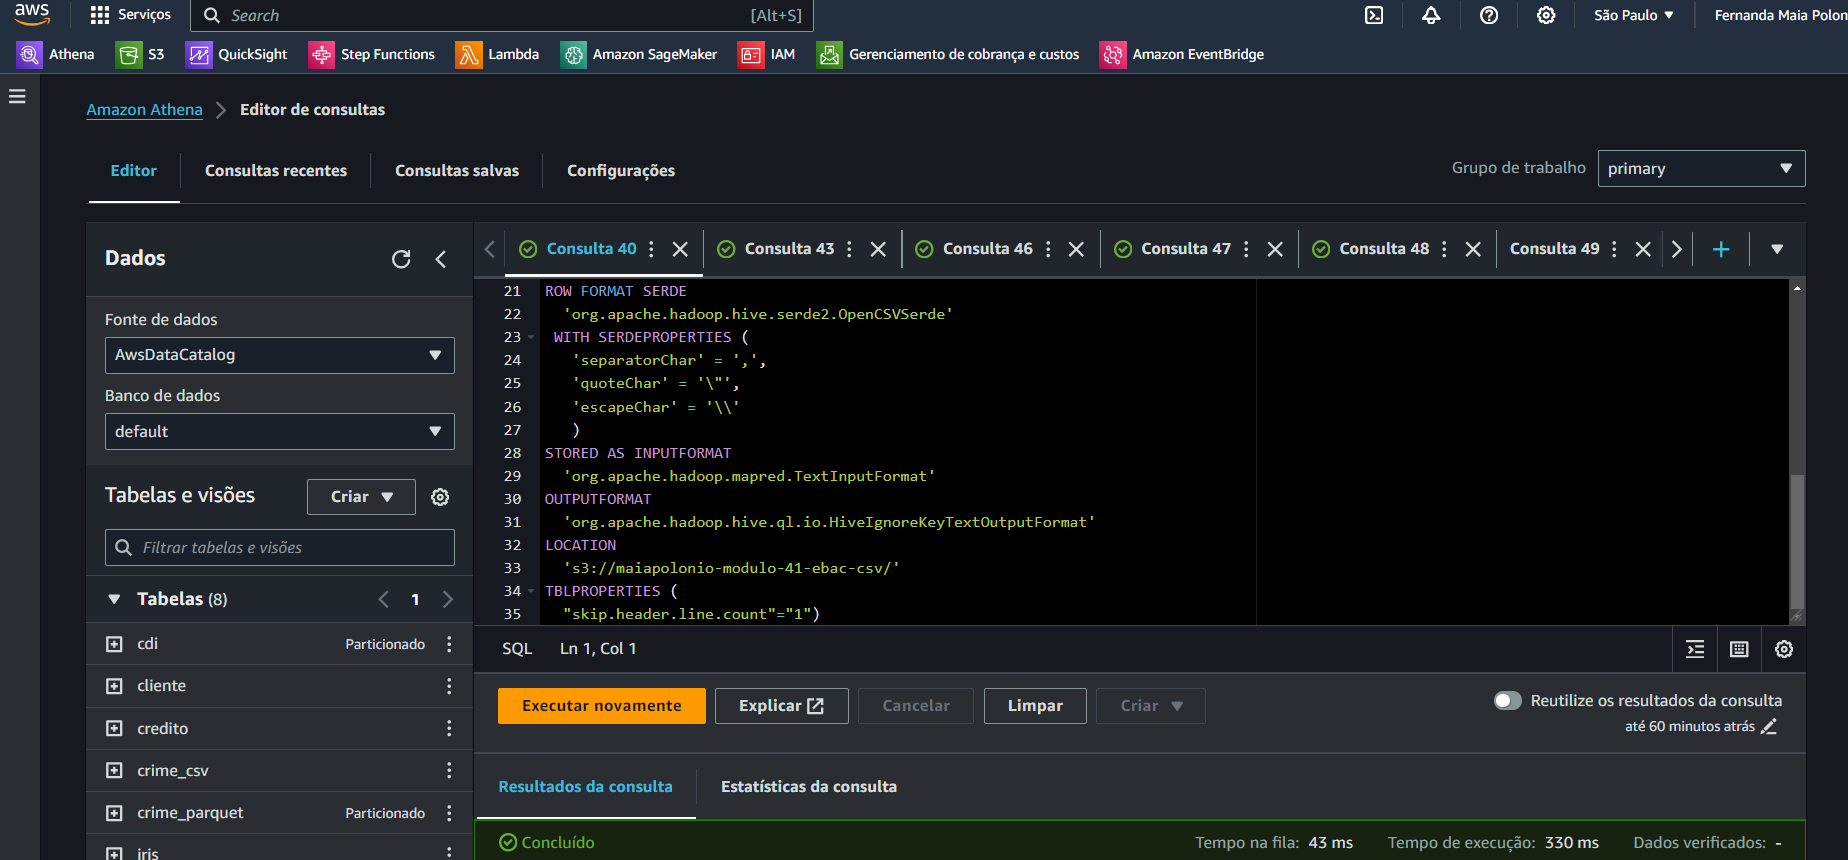

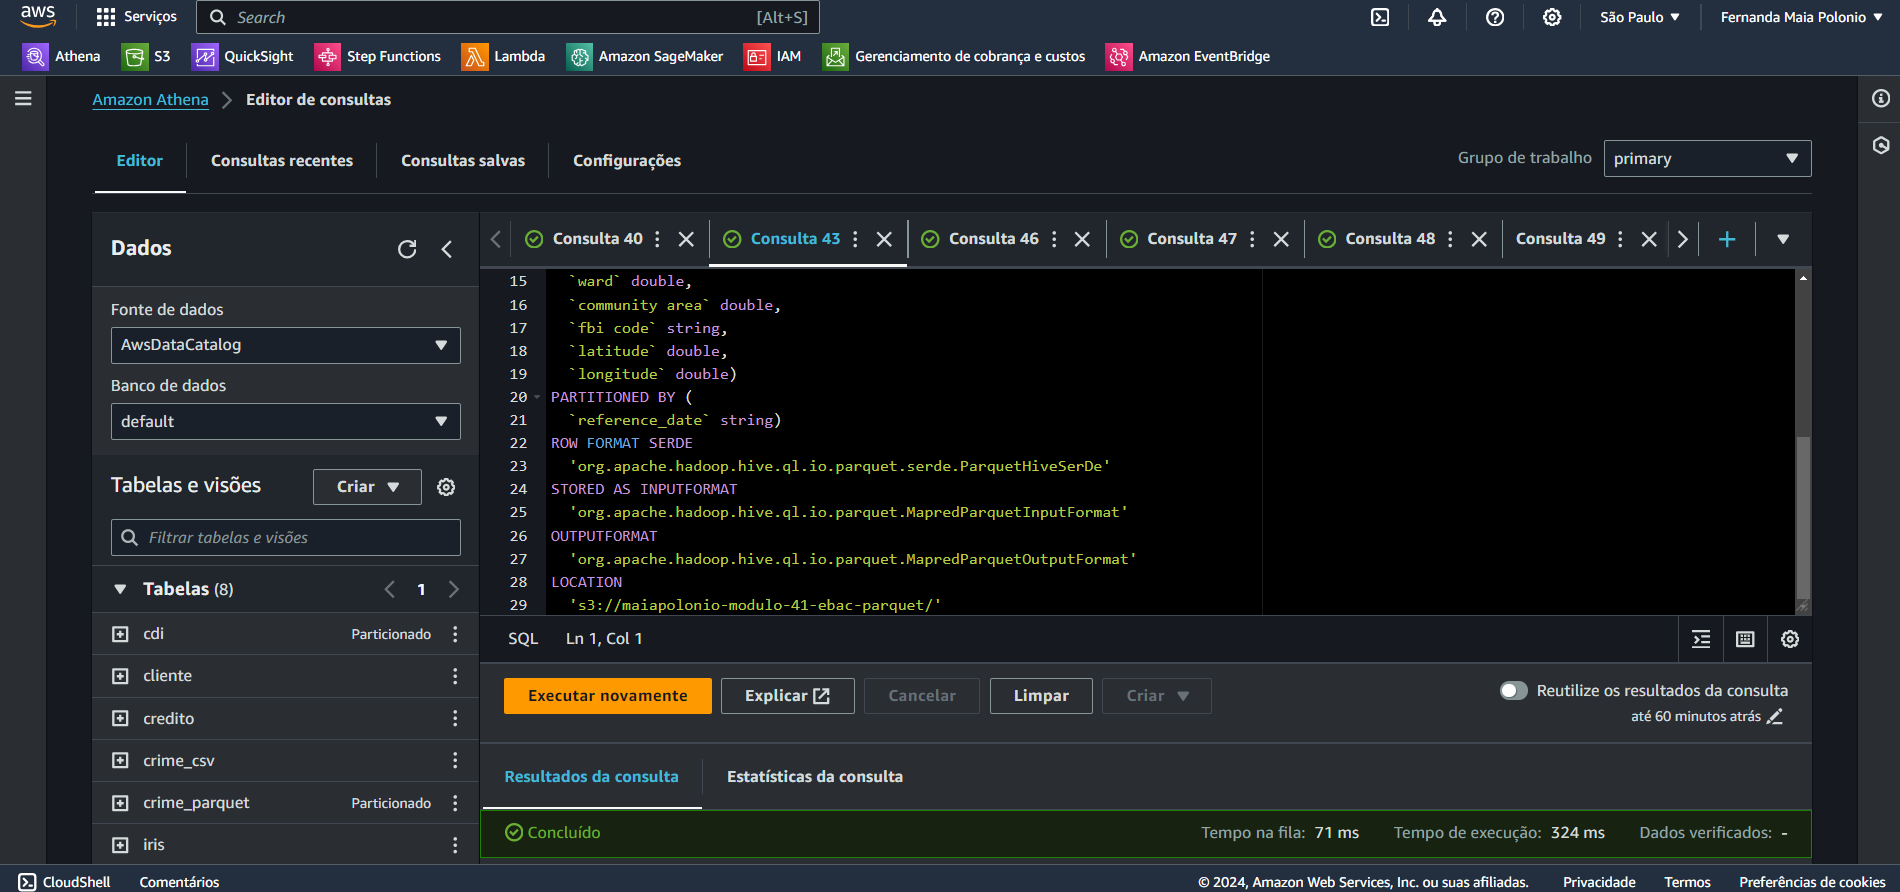

**Query 1 - Efeito da orientação a coluna:**

SELECT "location description", COUNT(1) as "amount"
FROM crime_csv
GROUP BY 1
ORDER BY 2 DESC;

SELECT "location description", COUNT(1) as "amount"
FROM crime_parquet
GROUP BY 1
ORDER BY 2 DESC;

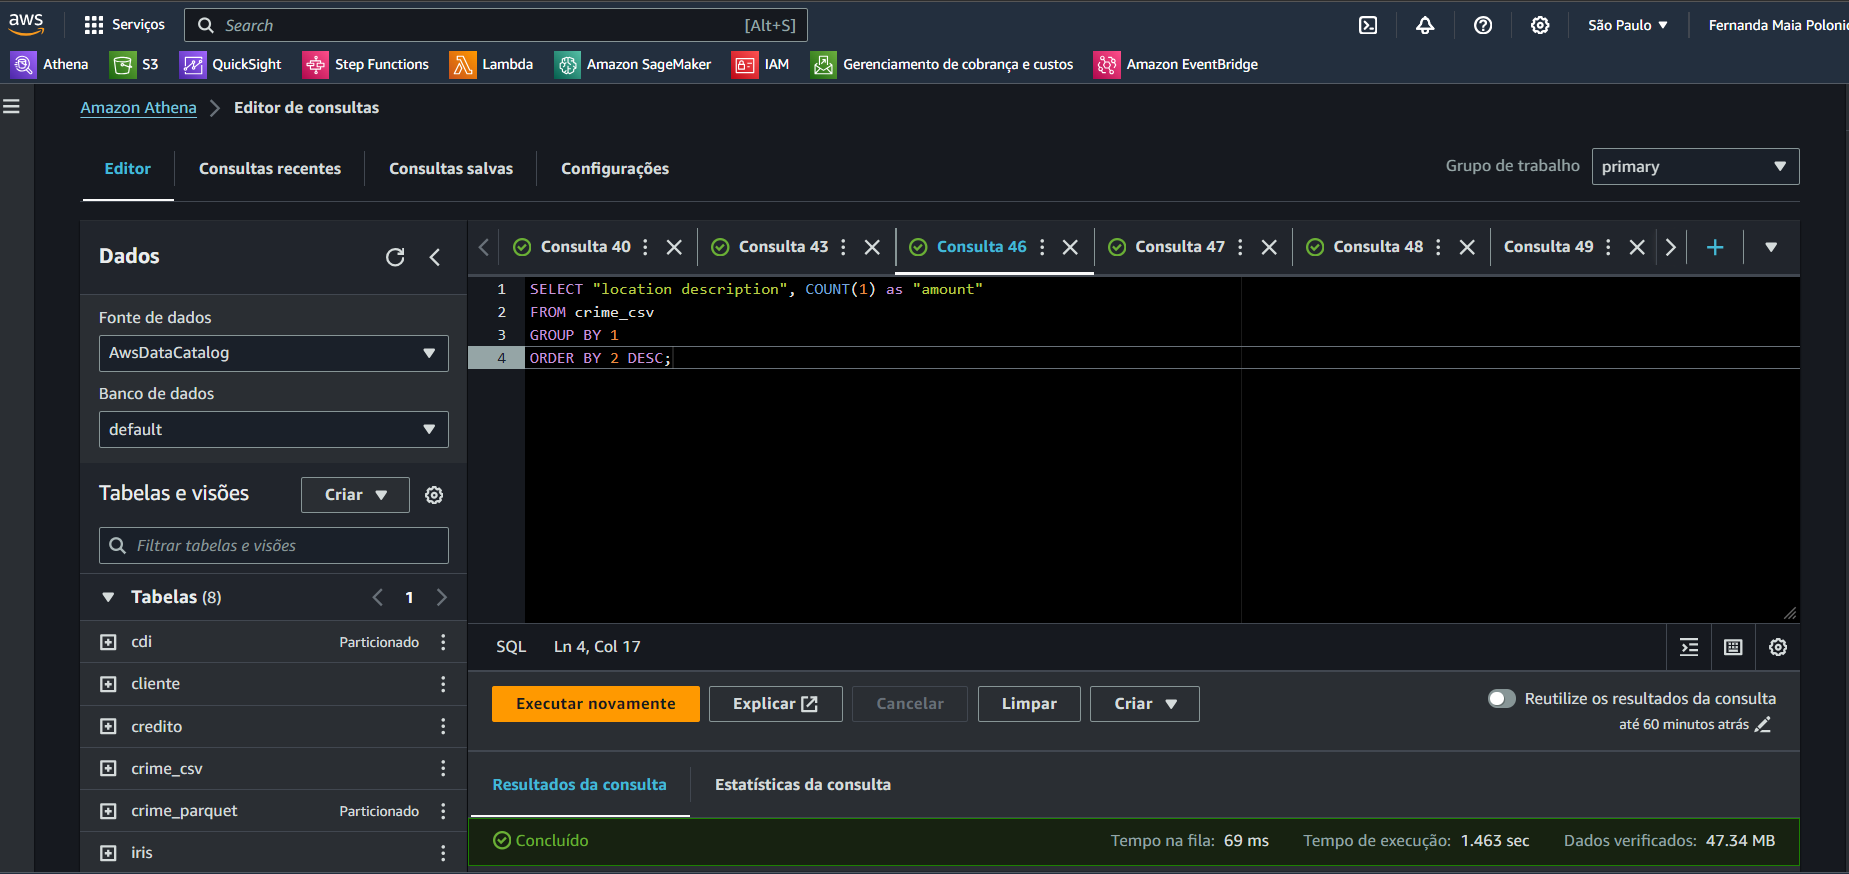

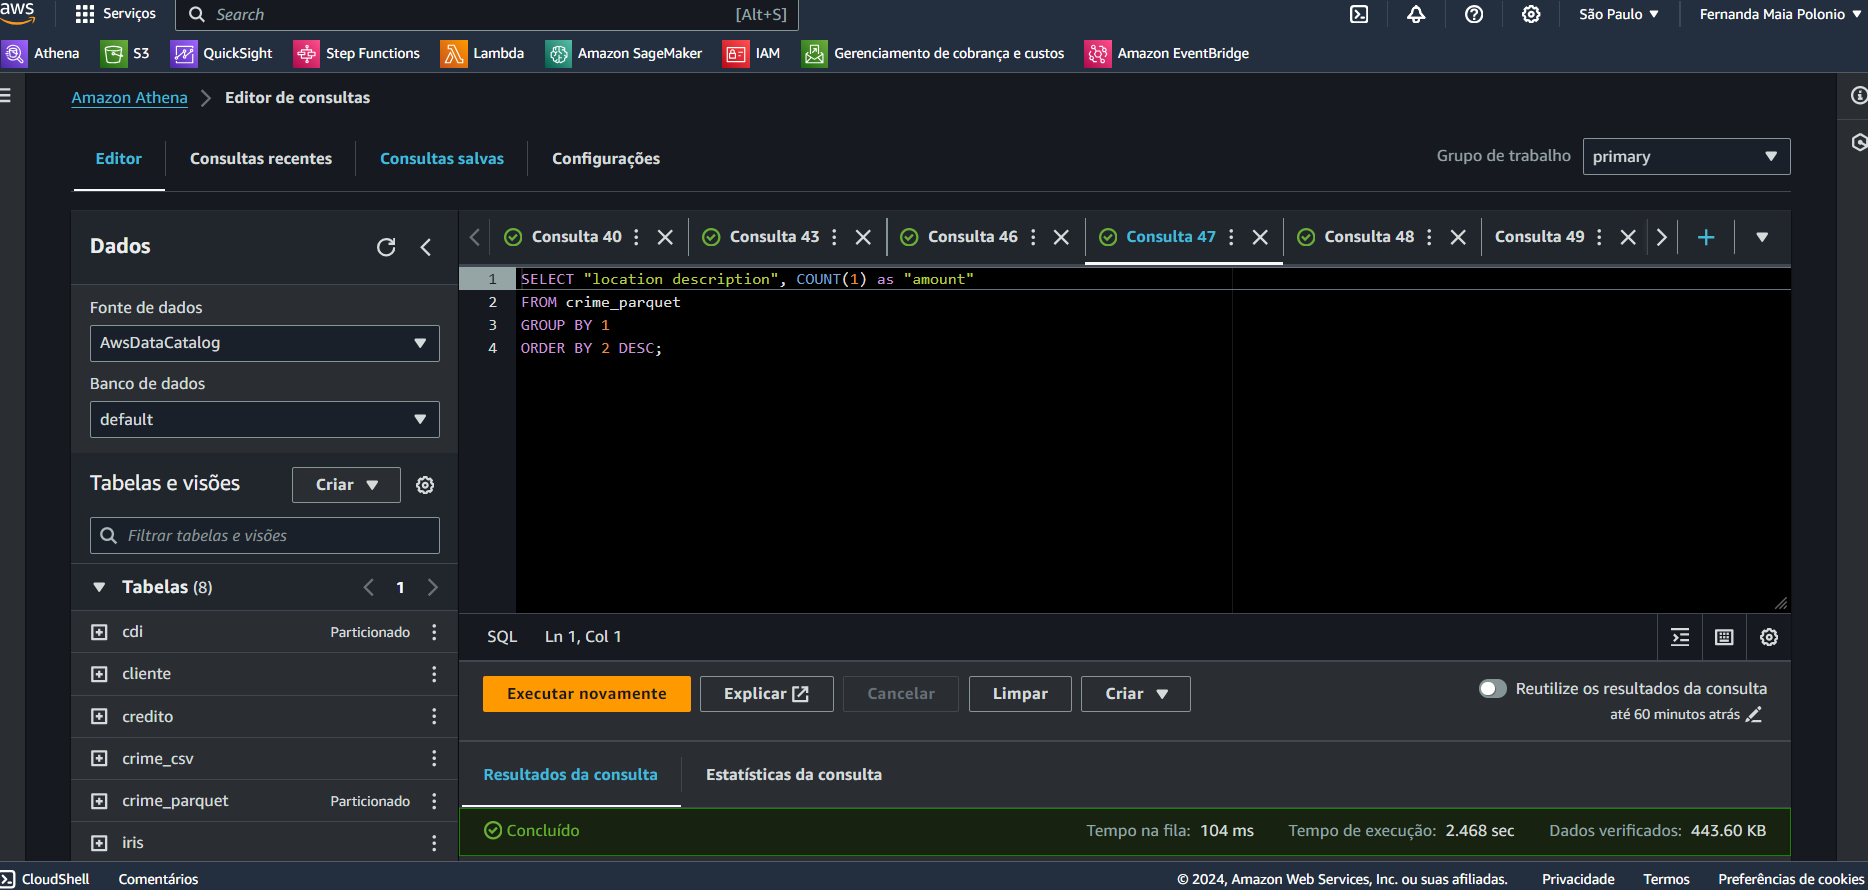

**Query 2 - Efeito do particionamento**

SELECT *
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'

SELECT *
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'

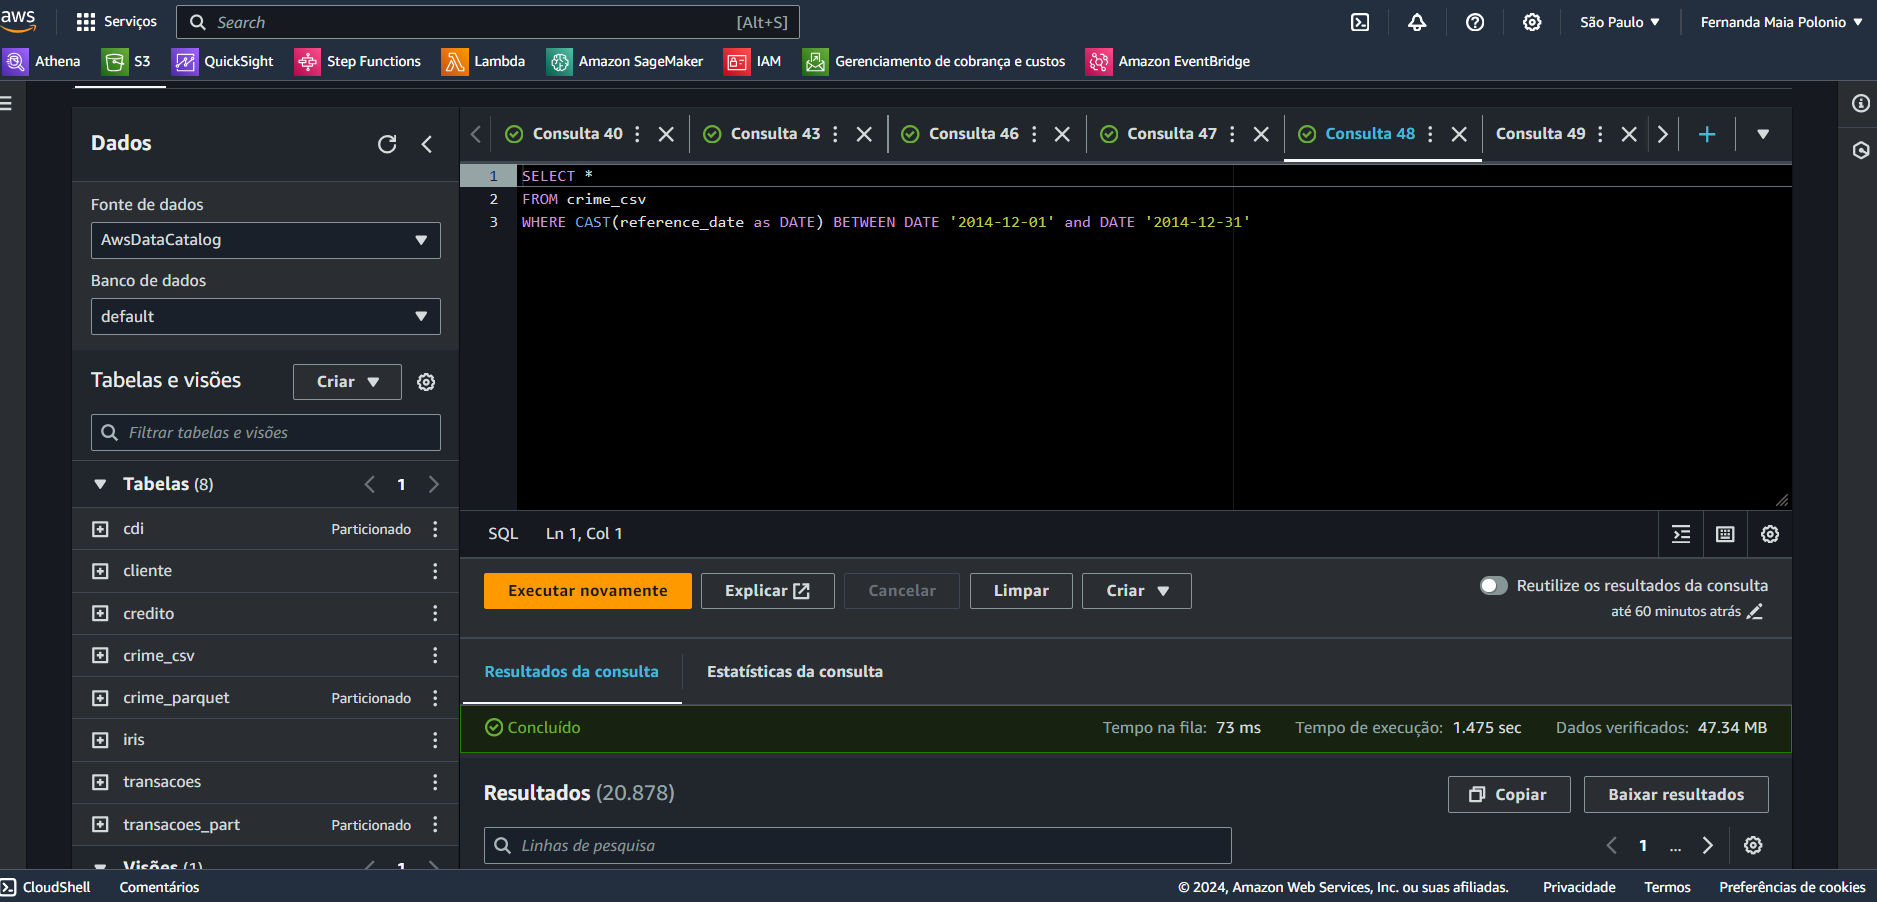

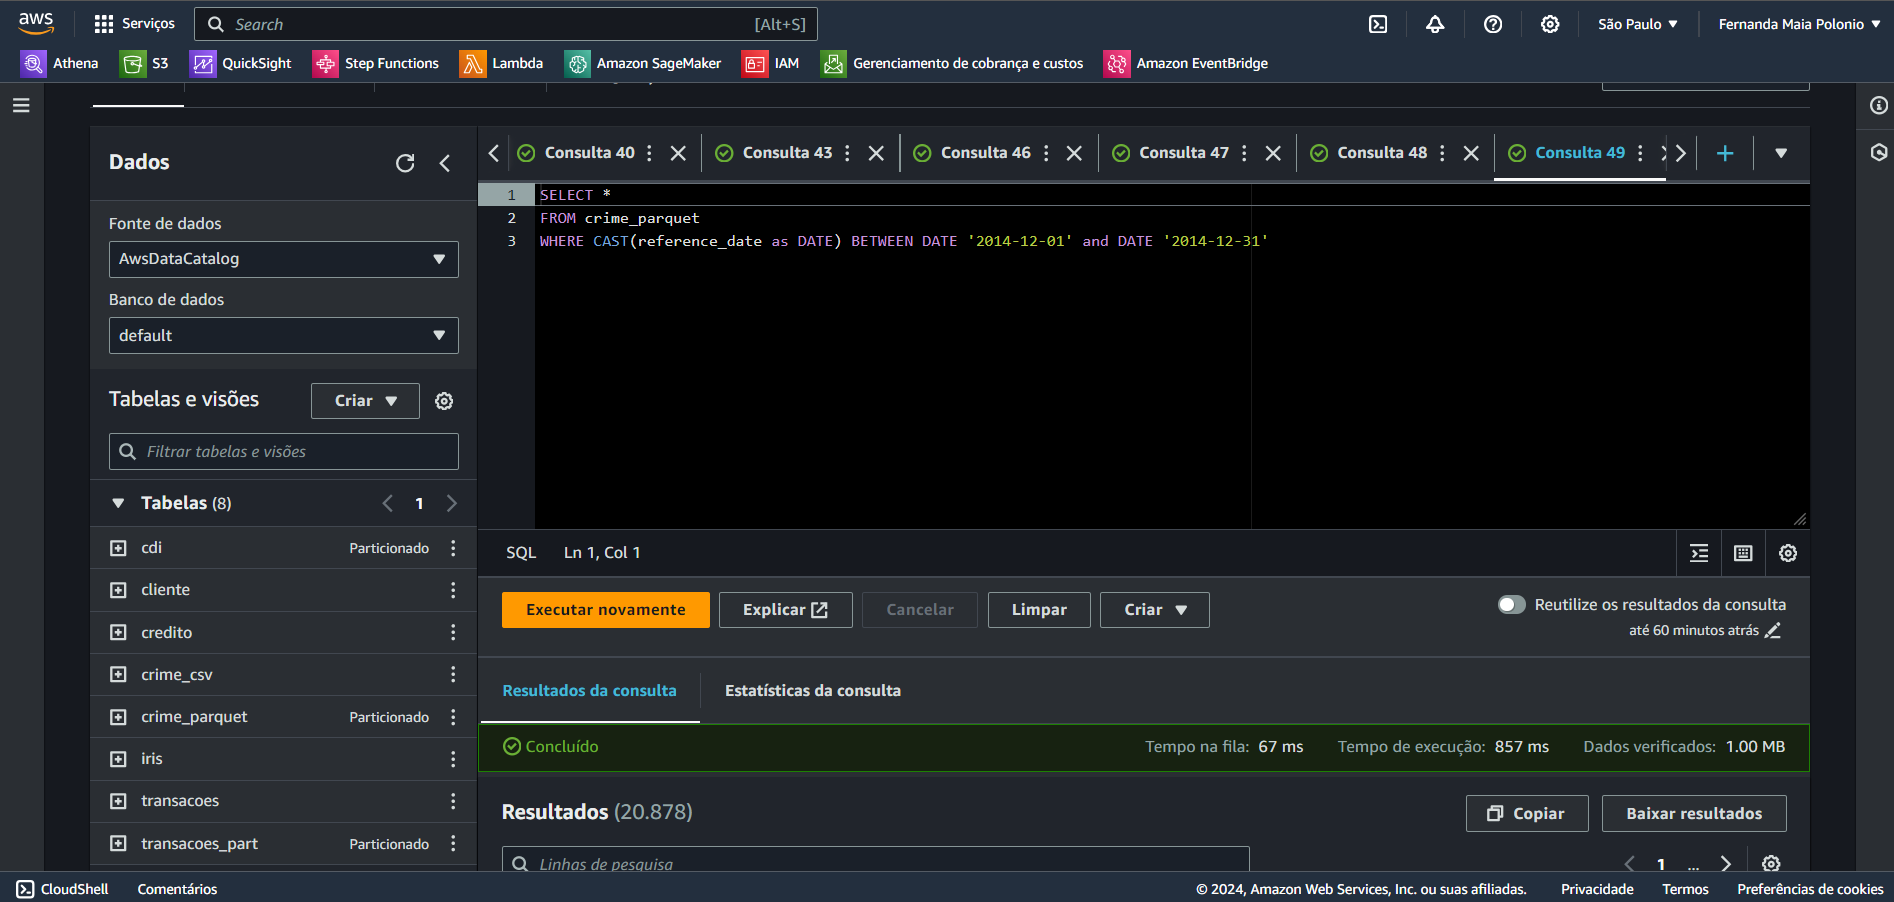

**Query 3 - Efeito da orientação a coluna e do particionamento.**

SELECT "location description", COUNT(1) as "amount"
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
GROUP BY 1
ORDER BY 2 DESC

SELECT "location description", COUNT(1) as "amount"
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
GROUP BY 1
ORDER BY 2 DESC

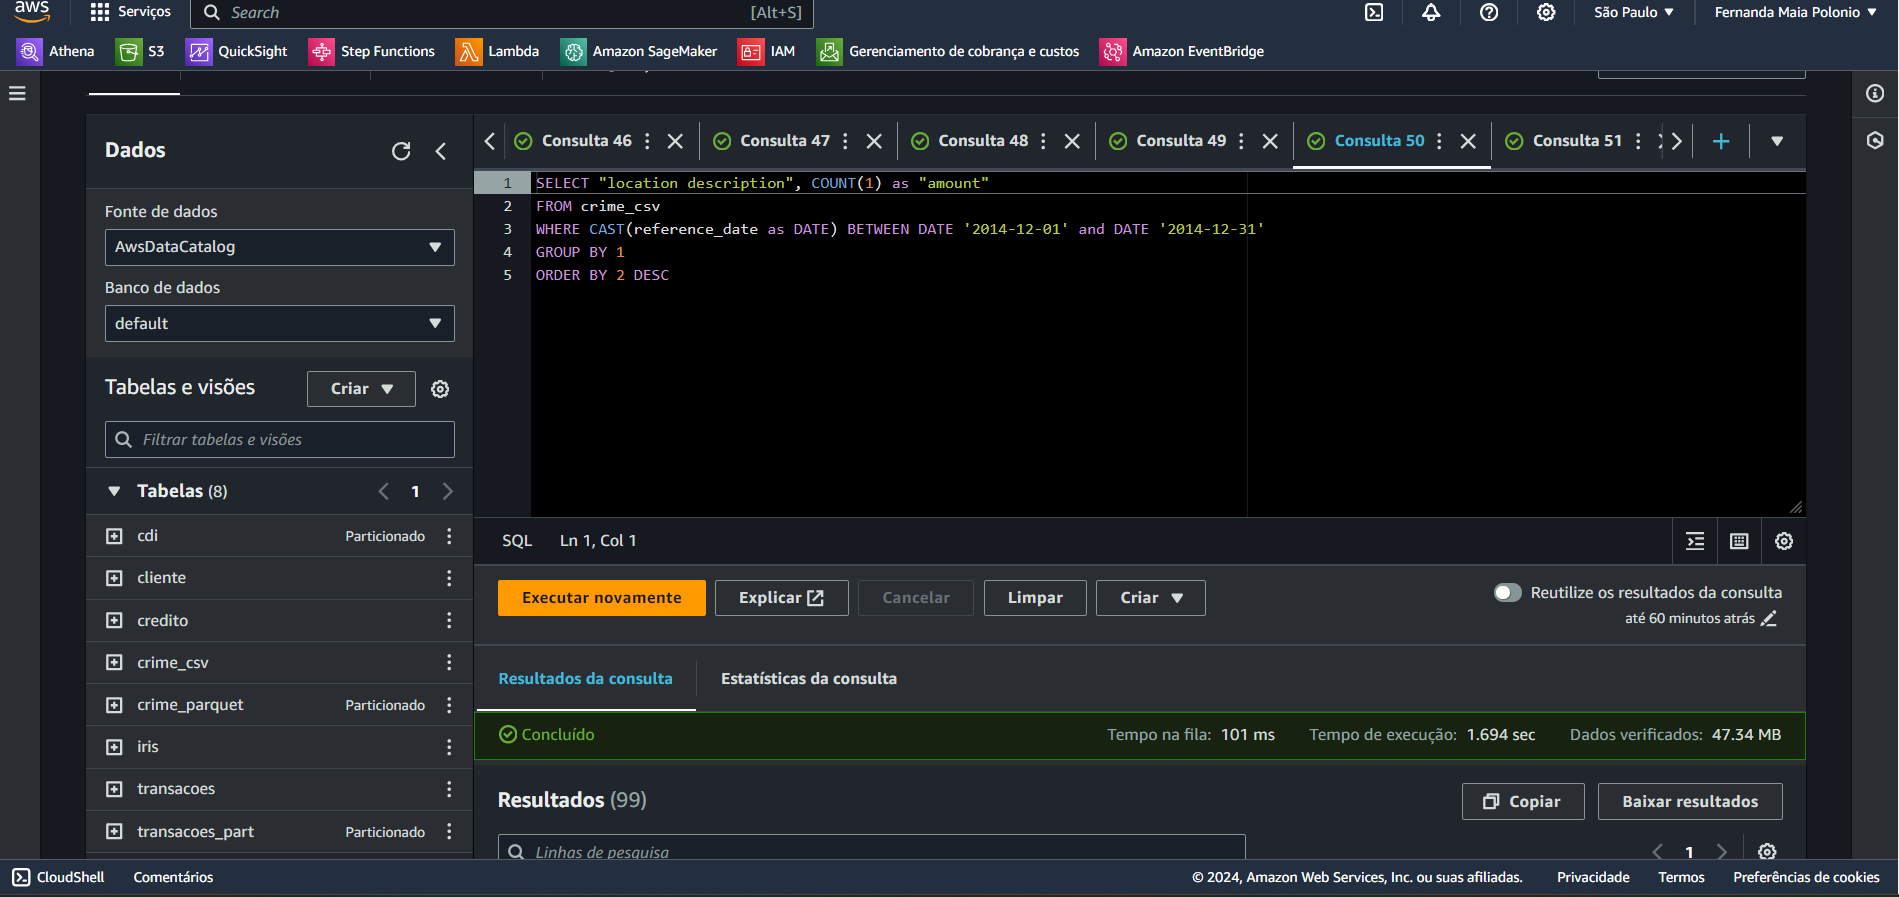

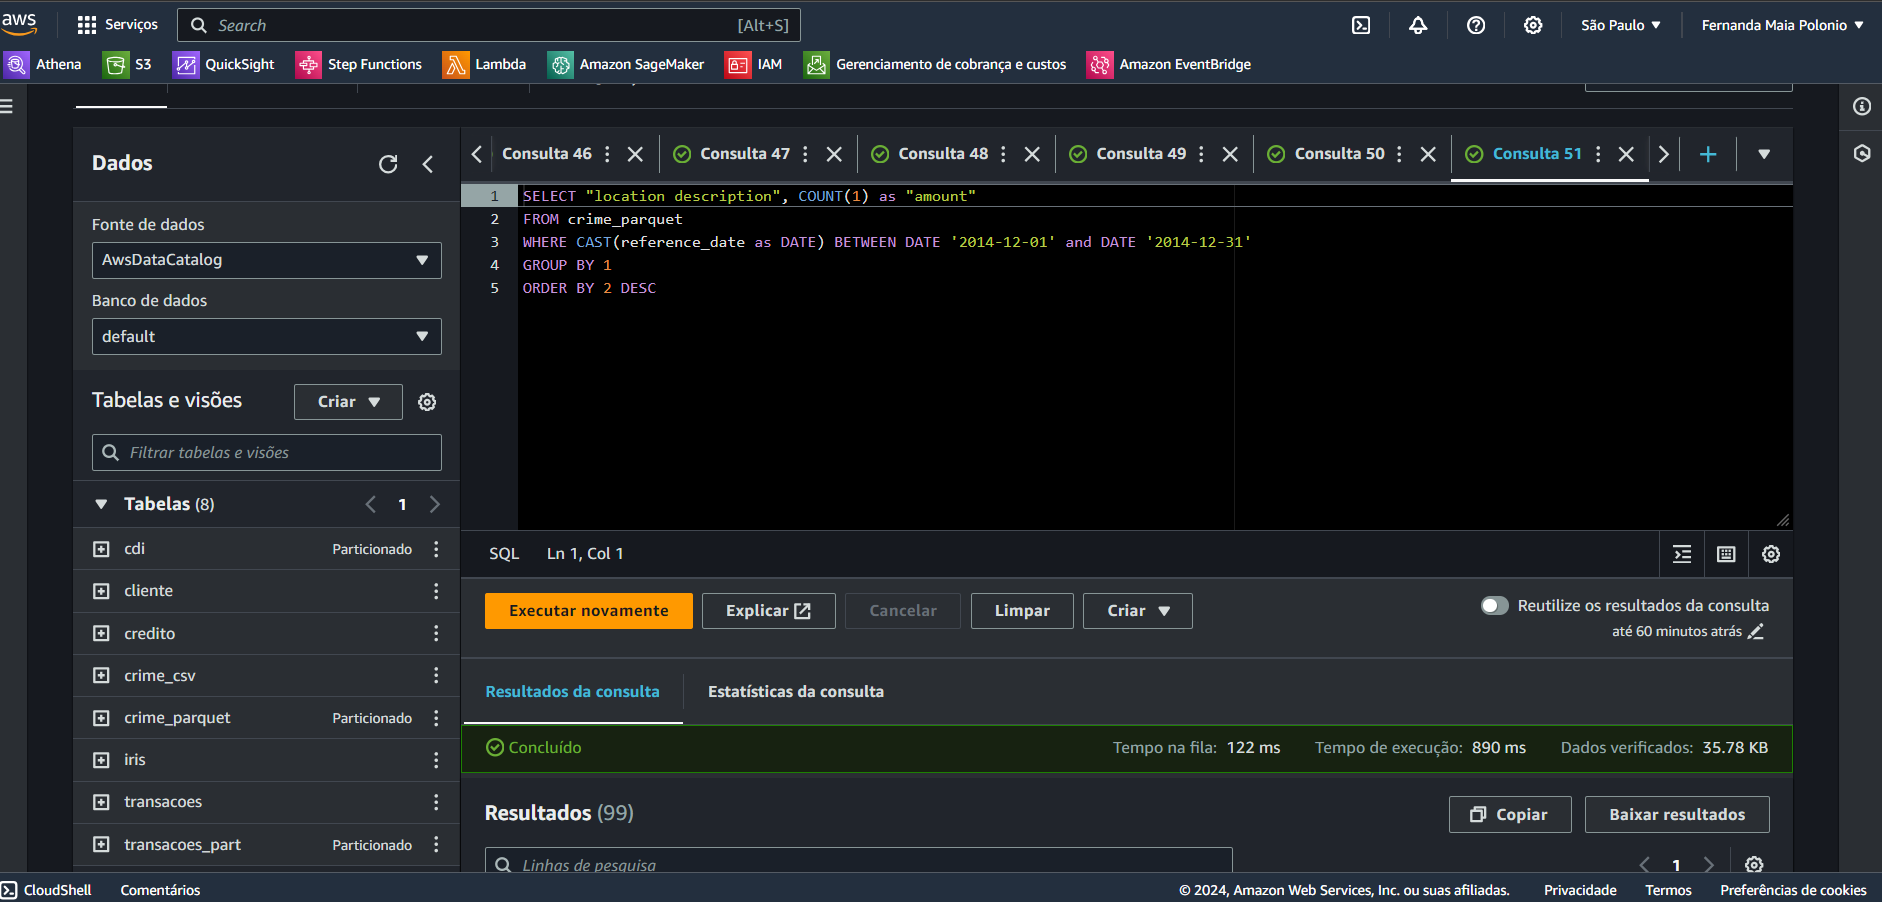